In [1]:
import BeaufortNumber as BN
import route
import ship
from route import save
import matplotlib.pyplot as plt
import math

### Input Data Kapal

In [2]:
# Input data kapal sebagai variabel yang akan digunakan
Vs = 13.02
Lpp = 90
B = 14.6              #Breadth
H = 7.2              #Depth
T = 5.76              #Drafts
Lwl = 1.04*Lpp
ship_type = 'tanker'
BHP = 1550 #kw
engine_speed = "medium speed engine"
sfoc = 191.05 #g/kwh #specific fuel oil consumption
start_time = 30

### Data Perbandingan antara Kecepatan, Hambatan, dan Power

In [4]:
data = ship.comparedata_inrange_speed(10.5, 16.5, Lpp, B, T, Lwl, BHP, engine_speed, ship_type)
data

,Vs,Resistance,Power
0,10.5,81.993601,916.794626
1,10.6,83.107252,939.262104
2,10.7,84.210109,961.940781
3,10.8,85.302427,984.831396
4,10.9,86.384459,1007.934668
5,11.0,87.456454,1031.251263
6,11.1,88.518650,1054.781725
7,11.2,89.571282,1078.526555
8,11.3,90.614568,1102.486042
9,11.4,91.648719,1126.660390


### Mencari kecepatan dan displacement kapal

In [5]:
Vs = ship.findspeed(data, BHP)
print('Vs = {:.2f} knots'.format(Vs))
displacement = ship.displacement(Vs, Lwl, B, T)
print('Displacement = {:.2f} m3'.format(displacement))

Vs = 13.03 knots
Displacement = 5595.73 m3


### Memasukkan data ke dalam program

In [8]:
Route_Data = route.Data('Jalur Pelayaran.xlsx')
Data = Route_Data

In [16]:
route1 = route.route('Jalur 1', Data, displacement, Vs, ship_type, BHP, sfoc, 10)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
wave_list(route, displacement, speed, ship_type, start_time)

### Melakukakan estimasi total jarak tempuh, waktu tempuh, dan konsumsi bahan bakar

In [10]:
datakumpulan = route.estimateall(Route_Data, displacement, Vs, ship_type, BHP, sfoc, start_time)

In [11]:
datakumpulan

,total distance (km),total sailing time (hour),total foc (ton)
Jalur 1,1402.887776,63.119166,18.691321
Jalur 2,1449.531259,64.118655,18.987297
Jalur 3,1410.430650,62.909718,18.629298
Jalur 4,1453.948528,64.276660,19.034087


In [4]:
route.dec_making(total_estimation, route1, route2, route3, route4, Lpp)

Jalur pelayaran dengan konsumsi bahan bakar paling minimum adalah Jalur 3


# Analisis Data

In [14]:
route1 = route.route('Jalur 1', Route_Data, displacement, Vs, ship_type, BHP, sfoc, start_time)
route2 = route.route('Jalur 2', Route_Data, displacement, Vs, ship_type, BHP, sfoc, start_time)
route3 = route.route('Jalur 3', Route_Data, displacement, Vs, ship_type, BHP, sfoc, start_time)
route4 = route.route('Jalur 4', Route_Data, displacement, Vs, ship_type, BHP, sfoc, start_time)

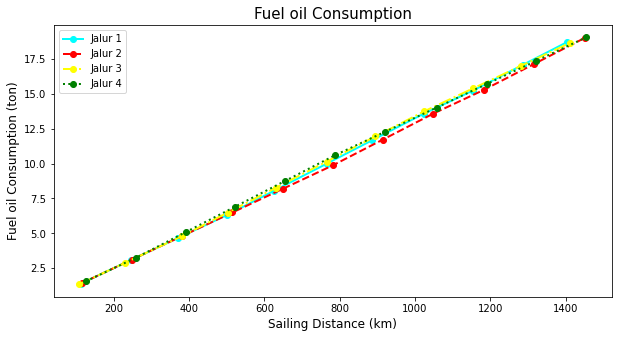

In [15]:
route.foc_graph(route1, route2, route3, route4)

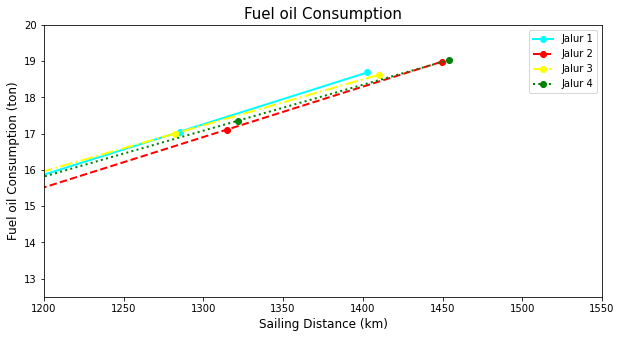

In [16]:
route.foc_graph_finish(route1, route2, route3, route4)

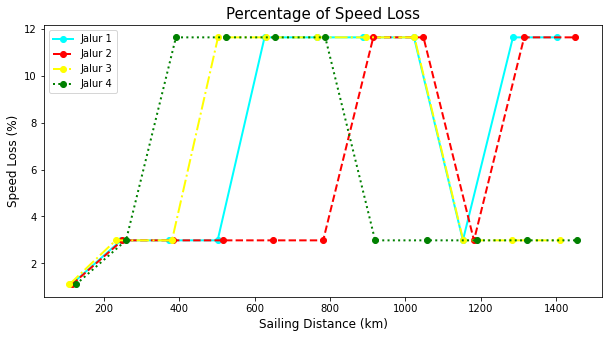

In [17]:
route.speed_loss_graph(route1, route2, route3, route4)

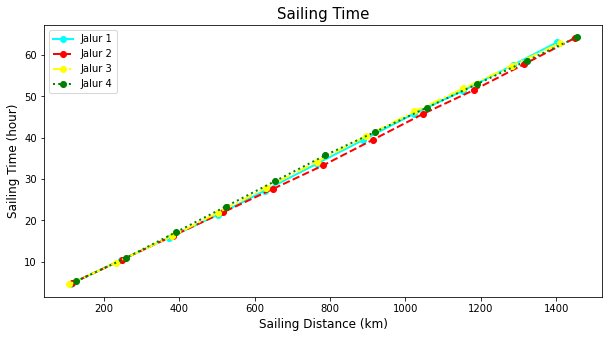

In [18]:
route.sailing_time_graph(route1, route2, route3, route4)

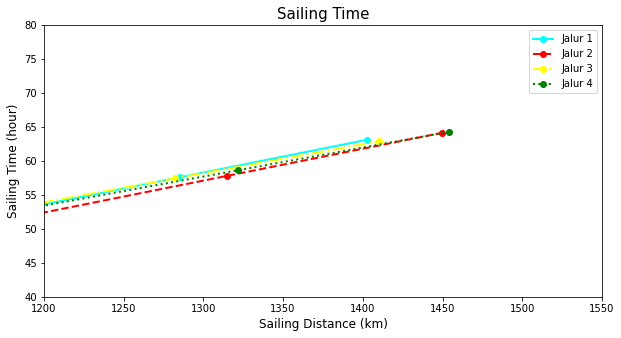

In [19]:
route.sailing_time_graph_finish(route1, route2, route3, route4)

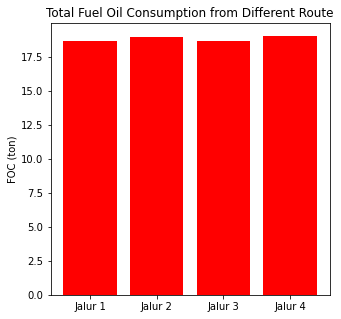

In [20]:
route.total_foc_graph(datakumpulan)

## Saving Data

In [21]:
save(route1, 'Jalur 1.csv')
save(route2, 'Jalur 2.csv')
save(route3, 'Jalur 3.csv')
save(route4, 'Jalur 4.csv')
save(ship.table_speed_loss(displacement, ship_type), 'Table BN.csv')

In [22]:
save(datakumpulan, 'Total Estimation.csv')

In [23]:
save(data, 'resistance and power.csv')